In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import strgen
import random
from censusname import Censusname
%config IPCompleter.greedy=True
path = os.getcwd()
os.listdir("C:\\Users\\chris\\OneDrive - Irwin's Safety and Industrial Labour Services Ltd\\Irwins\\output")

['.ipynb_checkpoints',
 '2013_2016.csv',
 'cec2018_unique_workers.csv',
 'cec_2018.csv',
 'daily.csv',
 'joffre_2018.csv',
 'multiple_areas.csv',
 'SB_analysis.csv',
 'SB_Histograms.xlsx',
 'sheerness_2017.csv',
 'shep_2018.csv',
 'simulation',
 'TA_database.csv',
 'TimeVsCode.xlsx',
 '~$TimeVsCode.xlsx']

In [2]:
path = "C:\\Users\\chris\\OneDrive - Irwin's Safety and Industrial Labour Services Ltd\\Irwins\\output"
colnames = ['csas_id','clean_date','entry_name','shift','crew_size','duration','facility_owner',
           'proj_name','proj_year','cause_code','time_phase','code_phase','person_hours',
           'work_order','vessel','facility','start_phase','start_time','stop_time','note','proj_id',
            'days_from_start','csa_per_day','work_start','code_timing','accountability','active',
            'work_occur','unique_entry']  
all_proj = pd.read_csv(path+"\\TA_database.csv",parse_dates=['work_start','start_time','stop_time'])
all_proj.columns = colnames

In [3]:
cec_2018 = all_proj.loc[(all_proj['proj_id']=='Calgary Energy Centre_2018')].copy()
cec_2018.index.name='index_id'
vessel_old = list(cec_2018['vessel'].astype('str').unique())
vessel_old = sorted(vessel_old)
vessel_new = ['Blow Down Tank', 'CT Exhaust Duct', 'CT Exhaust Duct',
 'CT Generator', 'CT Generator Vault', 'CT Generator', 'CT Inlet Scroll',
 'Combustion Turbine Generator Vault', 'Combustion Turbine Generator Vault',
 'Combustor Shell', 'Condenser Hot Well Upper', 'Condenser Waterbox',
 'Condensor Waterbox', 'Cooling Tower', 'Cooling Tower Basin', 'Demin Storage',
 'Exhaust Door East', 'HP Steam Drum', 'HP Steam Drum', 'HP Steam Drum',
 'HRSG Gas Side East', 'HRSG HP Drum', 'HRSG LP Drum', 'HRSG Reheater',
 'HRSG', 'Hotwell Upper Access', 'HRSG', 'HRSG', 'HRSG Blowdown Tank', 'HRSG',
 'LP Drum', 'LP Drum', 'Inlet Scroll', 'LP Drum', 'Main Condensor', 'ST Generator',
 'ST Hotwell Upper Access ', 'STG Condensor Waterbox', 'STG Terminal Box', 'ST Generator', 'nan']
vessel_dict = {vessel_old[i]:vessel_new[i] for i in range(len(vessel_old))}
vessel_dict

{'Blow Down Tank': 'Blow Down Tank',
 'CT Exhaust Duct': 'CT Exhaust Duct',
 'CT Exhaust Duct East': 'CT Exhaust Duct',
 'CT Generator': 'CT Generator',
 'CT Generator Vault East': 'CT Generator Vault',
 'CT Generator Vault West': 'CT Generator',
 'CT Inlet Scroll': 'CT Inlet Scroll',
 'Combustion Turbine Generator Vault': 'Combustion Turbine Generator Vault',
 'Combustion Turbine Generator Vault East': 'Combustion Turbine Generator Vault',
 'Combustor Shell': 'Combustor Shell',
 'Condenser Hot Well Upper': 'Condenser Hot Well Upper',
 'Condenser Waterbox NW & NE': 'Condenser Waterbox',
 'Condensor Waterbox': 'Condensor Waterbox',
 'Cooling Tower': 'Cooling Tower',
 'Cooling Tower Basin': 'Cooling Tower Basin',
 'Demin Storage': 'Demin Storage',
 'Exhaust Door East': 'Exhaust Door East',
 'HP Drum East/West': 'HP Steam Drum',
 'HP Drum West': 'HP Steam Drum',
 'HP Steam Drum': 'HP Steam Drum',
 'HRSG Gas Side East': 'HRSG Gas Side East',
 'HRSG HP Drum': 'HRSG HP Drum',
 'HRSG LP Drum 

In [4]:
cec_2018['vessel_clean'] = cec_2018['vessel'].map(vessel_dict).copy()
cec_2018['vessel_clean'].fillna("Cooling Tower Basin",inplace=True)

In [5]:
cec_2018['vessel_entry'] = cec_2018['vessel_clean']+": "+cec_2018['entry_name']
cec_2018['crew_size'].fillna(0,inplace=True)
cec_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 19910 to 21020
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   csas_id          1111 non-null   int64         
 1   clean_date       1111 non-null   object        
 2   entry_name       1111 non-null   object        
 3   shift            1111 non-null   object        
 4   crew_size        1111 non-null   float64       
 5   duration         1111 non-null   float64       
 6   facility_owner   1111 non-null   object        
 7   proj_name        1111 non-null   object        
 8   proj_year        1111 non-null   int64         
 9   cause_code       595 non-null    object        
 10  time_phase       1111 non-null   object        
 11  code_phase       872 non-null    object        
 12  person_hours     1099 non-null   float64       
 13  work_order       1111 non-null   object        
 14  vessel           1099 non-null   ob

In [6]:
cec_2018_tool_time = cec_2018.loc[(cec_2018['proj_id']=='Calgary Energy Centre_2018')&
                                  (cec_2018['active']=='working')].copy()
cec_2018_tool_time.head()

,csas_id,clean_date,entry_name,shift,crew_size,duration,facility_owner,proj_name,proj_year,cause_code,...,days_from_start,csa_per_day,work_start,code_timing,accountability,active,work_occur,unique_entry,vessel_clean,vessel_entry
index_id,,,,,,,,,,,,,,,,,,,,,
19913,9363945241,2018-05-26,Door 51,Night,2.0,1.066667,Enmax,Calgary Energy Centre,2018,NaN,...,0,1,2018-05-26 20:26:00,PostStart,tool time,working,yes,21129601 #1,CT Generator,CT Generator: Door 51
19917,9363945241,2018-05-26,Door 51,Night,2.0,1.000000,Enmax,Calgary Energy Centre,2018,NaN,...,0,1,2018-05-26 20:26:00,PostStart,tool time,working,yes,21129601 #1,CT Generator,CT Generator: Door 51
19921,8941955605,2018-05-27,Door 50,Night,4.0,0.466667,Enmax,Calgary Energy Centre,2018,NaN,...,1,1,2018-05-27 20:13:00,PostStart,tool time,working,yes,21129601 #1,CT Generator,CT Generator: Door 50
19925,8941955605,2018-05-27,Door 50,Night,4.0,0.283333,Enmax,Calgary Energy Centre,2018,NaN,...,1,1,2018-05-27 20:13:00,PostStart,tool time,working,yes,21129601 #1,CT Generator,CT Generator: Door 50
19929,8941955605,2018-05-27,Door 50,Night,4.0,1.550000,Enmax,Calgary Energy Centre,2018,NaN,...,1,1,2018-05-27 20:13:00,PostStart,tool time,working,yes,21129601 #1,CT Generator,CT Generator: Door 50


In [7]:
unique_workers = pd.read_csv(path+"\\cec2018_unique_workers.csv")
uw_key = list(unique_workers['clean_date'])
uw_value = list(unique_workers['WorkerId'])
uw_dict = {uw_key[i]:uw_value[i] for i in range(len(uw_key))}
uw_dict

{'2018-05-26': 2,
 '2018-05-27': 4,
 '2018-05-28': 5,
 '2018-05-29': 14,
 '2018-05-30': 16,
 '2018-05-31': 17,
 '2018-06-01': 13,
 '2018-06-02': 22,
 '2018-06-03': 14,
 '2018-06-04': 18,
 '2018-06-05': 11,
 '2018-06-06': 16,
 '2018-06-07': 5,
 '2018-06-08': 23,
 '2018-06-09': 20,
 '2018-06-10': 20,
 '2018-06-11': 25,
 '2018-06-12': 22,
 '2018-06-13': 29,
 '2018-06-14': 4,
 '2018-06-20': 9,
 '2018-06-21': 11,
 '2018-06-22': 5,
 '2018-06-23': 3}

In [8]:
cec_2018_tool_time['daily_required'] = cec_2018_tool_time['clean_date'].map(uw_dict).astype('int')
cec_2018_tool_time['crew_size'] = cec_2018_tool_time['crew_size'].astype('int') 
cec_2018_tool_time['work_stop'] = cec_2018_tool_time.groupby('csas_id')['stop_time'].transform('max')
cec_2018_tool_time = cec_2018_tool_time.sort_values(['work_start','csas_id','start_time']).reset_index()
cec_2018_tool_time['csas_id_match'] = cec_2018_tool_time['csas_id'].eq(cec_2018_tool_time['csas_id'].shift())
cec_2018_tool_time['csas_id_entries'] = cec_2018_tool_time.groupby('csas_id')['clean_date'].transform('count')
cec_2018_tool_time['next_csas_id_match'] = cec_2018_tool_time['csas_id_match'].shift(-1)
cec_2018_tool_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index_id            243 non-null    int64         
 1   csas_id             243 non-null    int64         
 2   clean_date          243 non-null    object        
 3   entry_name          243 non-null    object        
 4   shift               243 non-null    object        
 5   crew_size           243 non-null    int32         
 6   duration            243 non-null    float64       
 7   facility_owner      243 non-null    object        
 8   proj_name           243 non-null    object        
 9   proj_year           243 non-null    int64         
 10  cause_code          0 non-null      object        
 11  time_phase          243 non-null    object        
 12  code_phase          243 non-null    object        
 13  person_hours        241 non-null    float64       

In [124]:
# Generate 20 random names to populate a database.  Assumption is even if 31 workers doing jobs in a
# day, that they work on multiple work areas
name= Censusname()
first_name = []
last_name = []
company = []
companies = ['WeldingCorp1','WeldingCorp2','LaborerCorp','MillwrightCorp1','MillwrightCorp2']
for i in range(25):
    first,last = name.generate(given='male').split(" ")
    first_name.append(first)
    last_name.append(last)
    company.append(random.choice(companies))

In [139]:
workers = pd.DataFrame(list(zip(first_name,last_name,company)),columns=['FirstName','LastName','Company'])
workers.index.name= 'workerid'
workers.head()

,FirstName,LastName,Company
workerid,,,
0,Joseph,Page,MillwrightCorp2
1,Jose,Hux,MillwrightCorp1
2,Richard,Rich,MillwrightCorp1
3,Joe,Pate,WeldingCorp1
4,Archie,Childs,WeldingCorp1


In [140]:
def get_workers (df,start,stop,num,daily_required):
    avail_worker_list=[]
    daily_required = daily_required
    all_workers = set(df.iloc[:daily_required,0])
#     all_workers = set(df['WorkerId'])
    unavail_workers = set(df.loc[(df.TimeOut>start)&(df.TimeIn<stop)]['WorkerId'])
    avail = list(all_workers^unavail_workers)
    print(start)
    print(num)
    print("avail",avail)
    for n in range(num):
        workerid = random.choice(avail)
        avail_worker_list.append(workerid)
        avail.remove(workerid)
    return avail_worker_list

In [141]:
def get_entries (start_list, indexid, csasid, start, end, csa_entries, unused):
    if csa_entries == 1:
        num_workers = len(start_list)
    if len(unused)>0:
        num_workers = len(unused)
        avail_worker_list = list(unused)
        if len(unused) < len(start_list):
            num_workers = len(unused) + 1
            additional = list(set(start_list)^set(unused))
            avail_worker_list.append(random.choice(additional))
            print("added one!")
    else:
        num_workers = random.randint(1,len(start_list))
        avail_worker_list = start_list.copy()
    worker_list = []
    timein_list = []
    timeout_list = []
    return_list = []
    if num_workers == 1:
        workerid = random.choice(avail_worker_list)
        worker_list.append(workerid)
        timein_list.append(start)
        timeout_list.append(end)
    else:
        for i in range(num_workers):
            workerid = random.choice(avail_worker_list)
            worker_list.append(workerid)
            avail_worker_list.remove(workerid)
            if i ==0 or i ==1:
                timein_list.append(start)
                timeout_list.append(end)
            else:
                timein_list.append(random.random() * (end - start)/2 + start)
                timeout_list.append(random.random() * (start - end)/2 + end)
    returndf = pd.DataFrame(list(zip(worker_list,timein_list,timeout_list)),
                             columns=['WorkerId','TimeIn','TimeOut'])
    returndf['index_id'] = indexid
    returndf['csas_id'] = csasid
    return_list.append(returndf)
    return_list.append(worker_list)
    return return_list
                
    

In [142]:
eventscols = ['index_id','csas_id','TimeIn','TimeOut']
events = pd.DataFrame(columns=eventscols)
events['WorkerId'] = workers.index
events = events[['WorkerId','TimeIn','TimeOut','index_id','csas_id']]
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   WorkerId  25 non-null     int64 
 1   TimeIn    0 non-null      object
 2   TimeOut   0 non-null      object
 3   index_id  0 non-null      object
 4   csas_id   0 non-null      object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [143]:
for index, row in cec_2018_tool_time[cec_2018_tool_time['crew_size']>0].iterrows():
    if row['csas_id_match']==False:
        avail_workers = get_workers(events,row['start_time'],row['work_stop'],row['crew_size'],
                                    row['daily_required'])
        used_workers_list = []
        unused=""
    if row['next_csas_id_match']== False:
        flat_list = [item for sublist in used_workers_list for item in sublist]
        unused = list(set(avail_workers)^set(flat_list))
    newevents,used_workers = get_entries(avail_workers,row['index_id'],row['csas_id'],
                                         row['start_time'],row['stop_time'],row['csas_id_entries'],
                                         unused)
    used_workers_list.append(used_workers)
    events=events.append(newevents)

2018-05-26 20:26:00
2
avail [0, 1]
added one!
2018-05-27 20:13:00
4
avail [0, 1, 2, 3]
2018-05-28 11:12:00
4
avail [0, 1, 2, 3, 4]
2018-05-28 12:48:00
2
avail [0, 1, 2]
2018-05-29 08:36:00
8
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
added one!
2018-05-29 10:34:00
4
avail [0, 1, 2, 3, 4, 13]
2018-05-29 20:58:00
4
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
added one!
2018-05-30 08:40:00
5
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2018-05-30 10:51:00
2
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2018-05-30 11:11:00
2
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
added one!
2018-05-30 11:15:00
6
avail [0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]
added one!
2018-05-30 13:45:00
1
avail [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 14]
2018-05-31 05:05:00
4
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2018-05-31 07:45:00
4
avail [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
2018-05-31 08:04:00
9
avai

2018-06-23 09:08:00
3
avail [0, 1, 2]


In [ ]:
# create a file that shows unique workers per day as input into files
# events.groupby(events['clean_date'])['WorkerId'].nunique().to_csv(path+'\\cec2018_unique_workers.csv')


In [144]:
events.groupby('csas_id')['WorkerId'].nunique()

csas_id
16064865      4
47431840      3
125163869     7
233096537     2
389701276     4
             ..
9798998791    3
9901183446    2
9955860368    2
9977982285    2
9994318580    1
Name: WorkerId, Length: 111, dtype: int64

In [145]:
cec_2018_tool_time.groupby('csas_id')['crew_size'].min()

csas_id
16064865      4
47431840      3
125163869     7
233096537     2
389701276     4
             ..
9798998791    3
9901183446    2
9955860368    2
9977982285    2
9994318580    1
Name: crew_size, Length: 113, dtype: int32

In [146]:
events= events.dropna().reset_index(drop=True)
events = events[['WorkerId','TimeIn','TimeOut','index_id']]
events.index.name='eventid'
events.to_csv(path+'\\simulation\\rfid_simulation.csv')
workers.to_csv(path+"\\simulation\\workers.csv")
cec_2018.to_csv(path+"\\simulation\\cec_data.csv")

In [60]:
# events.index.name = 'ScanEventId'
# events.columns = ['WorkerId', 'TimeIn', 'TimeOut', 'FactIndexId']
# workers.index.name = 'WorkerId'
# cec_2018.index.name = 'FactIndexId'
# cec_2018.columns = ['WorkPackageId', 'Date', 'DoorName', 'Shift', 'CrewSize', 'Duration',
#        'FacilityOwner', 'FacilityName', 'Year', 'CauseCode', 'TimePhase',
#        'CodePhase', 'ManHours', 'WorkOrderId', 'Vessel', 'FacilityName2',
#        'StartPhase', 'StartTime', 'EndTime', 'Note', 'ProjectId',
#        'DaysFromStart', 'WorkPackagePerDay', 'DailyWorkStart', 'CodeTiming',
#        'Accountability', 'Active', 'WorkOccur', 'UniqueEntry',
#        'VesselClean', 'AreaName']
# # events.to_csv(path+'\\simulation\\rfid_simulation.csv')
# # workers.to_csv(path+"\\simulation\\workers.csv")
# # cec_2018.to_csv(path+"\\simulation\\cec_data.csv")

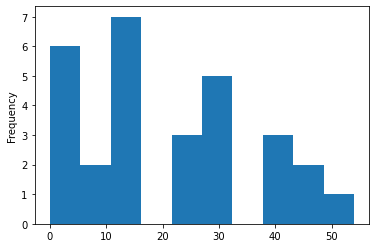

In [61]:
events['tool_time'] = (events.TimeOut-events.TimeIn).astype('timedelta64[h]')
events.groupby('WorkerId').sum()['tool_time'].plot.hist()

In [62]:
temp = cec_2018_tool_time.pivot_table(index=['clean_date'], columns = ['vessel_entry'], values = ['work_order'],
                aggfunc = lambda x:list(set(x)))
temp = temp.stack()
temp['unique_workorders'] = temp['work_order'].apply(lambda x: len(x))
temp[temp['unique_workorders']>1]

,,work_order,unique_workorders
clean_date,vessel_entry,,
2018-05-30,HRSG Gas Side East: Door 14,"[21138284, 21118251]",2
2018-06-11,CT Exhaust Duct: Door 48A,"[21122364, 21098008]",2
2018-06-12,Blow Down Tank: Door 25,"[21195481, 21145481]",2
